MNIST Handwriting Recogniton CNN Tensorflow Practice
===
Kenny Hsieh, 2018/3/17

In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import time

mnist = input_data.read_data_sets("MNSIT_data/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNSIT_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNSIT_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNSIT_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNSIT_data/t10k-labels-idx1-ubyte.gz


In [0]:
def weight(shape):
  return tf.Variable(tf.truncated_normal(shape, stddev = 0.1, name = "W"))

def bias(shape):
  return tf.Variable(tf.constant(0.1, shape = shape, name = "b"))
                     
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding ='SAME')

In [4]:
# Convolution Neural Networks
with tf.name_scope('Input_Layer'):
  x = tf.placeholder("float", shape = [None, 784], name = "x")
  x_image = tf.reshape(x, [-1, 28, 28, 1]) # -1 : ambigious number of inputs, 28x28: the dim of img, 1 : single color

with tf.name_scope('C1_Conv'):
  W1 = weight([5, 5, 1, 16]) #5*5 : filter weight, 1: single color, 16: num of img
  b1 = bias([16])
  Conv1 = conv2d(x_image, W1) + b1
  C1_Conv = tf.nn.relu(Conv1)
  
with tf.name_scope('C1_Pool'):
  C1_Pool = max_pool_2x2(C1_Conv)
  
with tf.name_scope('C2_Conv'):
  W2 = weight([5, 5, 16, 36])
  b2 = bias([36])
  Conv2 = conv2d(C1_Pool, W2) + b2
  C2_Conv = tf.nn.relu(Conv2)
  
with tf.name_scope('C2_Pool'):
  C2_Pool = max_pool_2x2(C2_Conv)

# Fully Connected Layer
with tf.name_scope('D_Flat'):
  D_Flat = tf.reshape(C2_Pool, [-1, 1764]) # 1764 = 36*7*7

with tf.name_scope('D_Hidden_1'):
  W3 = weight([1764, 128])
  b3 = bias([128])
  D_Hidden1 = tf.nn.relu(tf.matmul(D_Flat, W3) + b3)
  D_Hidden1_Dropout = tf.nn.dropout(D_Hidden1, keep_prob = 0.8)
  
with tf.name_scope('Output_Layer'):
  W4 = weight([128, 10])
  b4 = bias([10])
  y_predict = tf.nn.softmax(tf.matmul(D_Hidden1_Dropout, W4) + b4)

# Compile
with tf.name_scope('Optimizer'):
  y_label = tf.placeholder("float", shape = [None, 10], name = 'y_label')
  loss_function = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(
      logits = y_predict,
      labels = y_label))
  optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss_function)
  
with tf.name_scope('Evaluate_model'):  
  correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.argmax(y_label, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [16]:
epochs = 30
batch_size = 100
totalBatch = int(mnist.train.num_examples / batch_size)
epoch_list = []; accuracy_list = []; loss_list = []

from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
  for i in range(batch_size):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {x : batch_x, y_label : batch_y})
  
  loss, acc = sess.run([loss_function, accuracy], feed_dict = {x : mnist.validation.images,
                                                           y_label : mnist.validation.labels})

  epoch_list.append(epoch)
  loss_list.append(loss)
  accuracy_list.append(acc)
  print("Train Epoch :", '%02d' % (epoch + 1),
       ", Loss: ", '{:.9f}'.format(loss),
       ", Accuracy: ", acc)
  
duration = time() - startTime
print('Train Finished takes:', duration)

Train Epoch : 01 , Loss :  1.580338717 , Accuracy :  0.8972
Train Epoch : 02 , Loss :  1.529694080 , Accuracy :  0.9392
Train Epoch : 03 , Loss :  1.517889619 , Accuracy :  0.9476
Train Epoch : 04 , Loss :  1.504756093 , Accuracy :  0.9602
Train Epoch : 05 , Loss :  1.504822612 , Accuracy :  0.9598
Train Epoch : 06 , Loss :  1.498236179 , Accuracy :  0.9664
Train Epoch : 07 , Loss :  1.494169116 , Accuracy :  0.9672
Train Epoch : 08 , Loss :  1.491799593 , Accuracy :  0.97
Train Epoch : 09 , Loss :  1.487881303 , Accuracy :  0.9748
Train Epoch : 10 , Loss :  1.487639070 , Accuracy :  0.9738
Train Epoch : 11 , Loss :  1.488907456 , Accuracy :  0.9726
Train Epoch : 12 , Loss :  1.486625910 , Accuracy :  0.9746
Train Epoch : 13 , Loss :  1.488131285 , Accuracy :  0.9726
Train Epoch : 14 , Loss :  1.483729005 , Accuracy :  0.9792
Train Epoch : 15 , Loss :  1.484923005 , Accuracy :  0.9768
Train Epoch : 16 , Loss :  1.486744881 , Accuracy :  0.9762
Train Epoch : 17 , Loss :  1.484361768 , A

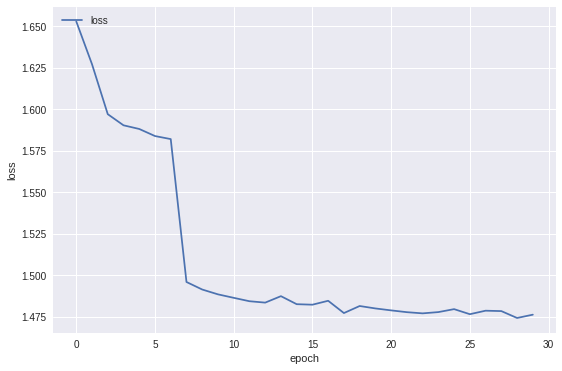

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc = 'upper left')

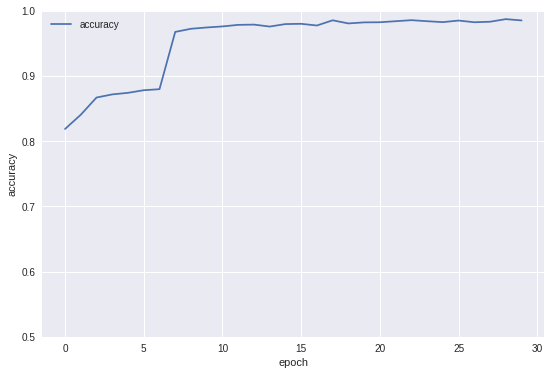

In [10]:
plt.plot(epoch_list, accuracy_list, label = 'accuracy')
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.ylim(0.5, 1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc = 'upper left')

In [11]:
print("Accuracy : ", sess.run(accuracy, feed_dict = {x : mnist.test.images, y_label : mnist.test.labels}))

Accuracy :  0.9885


In [12]:
prediction_result = sess.run(tf.argmax(y_predict, 1), feed_dict = {x : mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

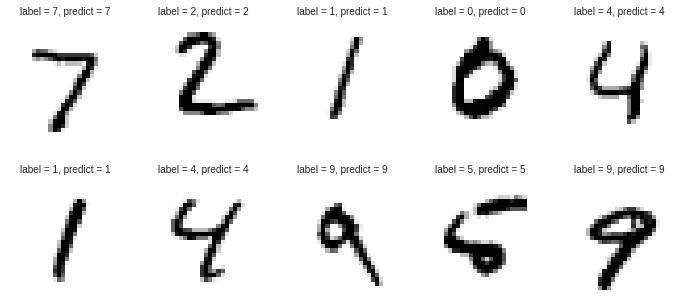

In [15]:
import numpy as np

def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(np.reshape(images[idx], (28, 28)), cmap = 'binary')
    title = 'label = ' + str(np.argmax(labels[idx]))
    
    if len(prediction) > 0:
      title += ", predict = " + str(prediction[idx])
    
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1
  plt.show()

plot_images_labels_prediction(mnist.test.images, mnist.test.labels, prediction_result, 0)